In [14]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import ipywidgets as widgets
from IPython.display import display

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
pokemon_df = pd.read_sql_query("SELECT * from Pokemon", con)
trainers_df = pd.read_sql_query("SELECT * from Trainers", con)

# Verify that result of SQL query is stored in the dataframe

con.close()

In [2]:
pokemon_df.head() # Pokemon head 

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64


In [3]:
pokemon_df.describe() # Pokemon data description

,trainerID,place,pokelevel,hp,maxhp,attack,defense,spatk,spdef,speed
count,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000
mean,5868.511700,1.182614,40.442508,120.074712,120.074712,80.585995,75.943827,73.859707,74.429697,74.815546
std,3354.630027,1.334142,18.236740,59.720906,59.720906,46.502081,43.869618,42.817827,43.263908,42.983738
min,0.000000,0.000000,2.000000,14.000000,14.000000,6.000000,6.000000,6.000000,6.000000,7.000000
25%,3012.000000,0.000000,28.000000,77.000000,77.000000,46.000000,44.000000,44.000000,44.000000,45.000000
50%,5873.000000,1.000000,40.000000,116.000000,116.000000,73.000000,70.000000,68.000000,68.000000,68.000000
75%,8734.250000,2.000000,50.000000,150.000000,150.000000,105.000000,98.000000,95.000000,98.000000,97.000000
max,11859.000000,5.000000,100.000000,656.000000,656.000000,361.000000,501.000000,349.000000,501.000000,361.000000


In [4]:
trainers_df.head() # Trainers head

,trainerID,trainername
0,0,A-list Actor Alonso
1,1,A-list Actor Ricardo
2,2,Ace Duo Elina & Sean
3,3,Ace Duo Jude & Rory
4,4,Ace Duo Jude & Rory


In [5]:
pokemon_df["Combat Power"] = (pokemon_df["hp"]+pokemon_df["attack"]+pokemon_df["defense"]+pokemon_df["spatk"]+pokemon_df["spdef"]+pokemon_df["speed"])*pokemon_df["pokelevel"]*6/100
pokemon_df.describe()

,trainerID,place,pokelevel,hp,maxhp,attack,defense,spatk,spdef,speed,Combat Power
count,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000
mean,5868.511700,1.182614,40.442508,120.074712,120.074712,80.585995,75.943827,73.859707,74.429697,74.815546,1476.400578
std,3354.630027,1.334142,18.236740,59.720906,59.720906,46.502081,43.869618,42.817827,43.263908,42.983738,1474.132342
min,0.000000,0.000000,2.000000,14.000000,14.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.520000
25%,3012.000000,0.000000,28.000000,77.000000,77.000000,46.000000,44.000000,44.000000,44.000000,45.000000,530.400000
50%,5873.000000,1.000000,40.000000,116.000000,116.000000,73.000000,70.000000,68.000000,68.000000,68.000000,1184.040000
75%,8734.250000,2.000000,50.000000,150.000000,150.000000,105.000000,98.000000,95.000000,98.000000,97.000000,1963.920000
max,11859.000000,5.000000,100.000000,656.000000,656.000000,361.000000,501.000000,349.000000,501.000000,361.000000,10266.000000


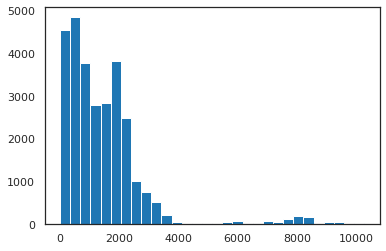

In [6]:
sns.set_style("white")
sns.set_context("notebook")


plt.hist(pokemon_df['Combat Power'], bins=30)
plt.show()

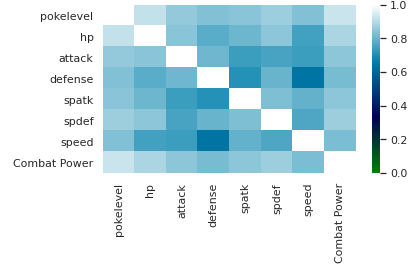

In [7]:

corr = pokemon_df[["pokelevel","hp","attack","defense","spatk","spdef","speed","Combat Power"]].corr()
sns.heatmap(corr,cmap="ocean",vmax=1,vmin=0)
plt.tight_layout()

In [8]:
pokemon_df[["pokelevel","hp","attack","defense","spatk","spdef","speed","Combat Power","type1"]].groupby("type1").mean()

,pokelevel,hp,attack,defense,spatk,spdef,speed,Combat Power
type1,,,,,,,,
Bug,36.794939,102.602094,70.067190,66.422339,58.660558,67.058464,67.332461,1246.780288
Dark,44.896359,127.705882,100.726891,78.605042,80.854342,82.144258,91.564426,1723.970168
Dragon,50.129088,150.142857,116.414802,100.950086,99.010327,103.781411,99.555938,2341.549983
Electric,39.371562,108.522055,68.549559,68.431240,88.048780,72.945511,89.575506,1462.468770
Fairy,41.201220,125.990854,71.173780,74.073171,77.335366,82.634146,54.655488,1444.315793
Fighting,40.276093,124.544987,96.572237,71.207198,56.647815,72.602057,67.057584,1416.961234
Fire,41.519060,120.692503,88.202668,75.781449,89.613088,80.897713,80.121347,1627.910966
Flying,51.666667,168.000000,95.666667,106.000000,123.666667,106.000000,150.666667,2329.400000
Ghost,41.456942,111.249561,70.978910,72.961336,96.383128,79.513181,80.490334,1544.868295


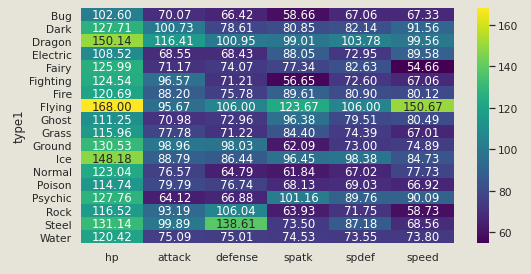

In [9]:
plt.figure(num=None, figsize=(8, 4), dpi=70, facecolor='#E6E3D9', edgecolor='k')
sns.heatmap(pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").mean(),annot=True,fmt=".2f",cmap="viridis")
plt.tight_layout()

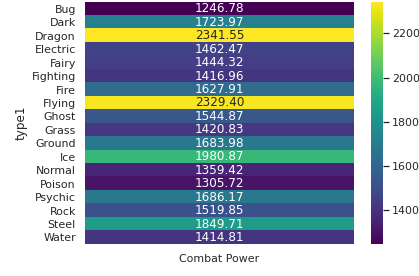

In [10]:
sns.heatmap(pokemon_df[["Combat Power","type1"]].groupby("type1").mean(),annot=True,fmt=".2f",cmap="viridis")
plt.tight_layout()

In [20]:
choice_widget = widgets.Dropdown(options=["Minimum", "Maksimum","Średnia","Mediana","Odchylenie standardowe","Kwartyl 1.","Kwartyl 3."])

value = {"option": choice_widget.value}

run_button = widgets.Button(description="Run")


def button_callback(button):
    slowniczek = {
        "Minimum": pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").min(),
        "Maksimum" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").max(),
        "Średnia" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").mean(),
        "Mediana" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").median(),
        "Odchylenie standardowe" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").std(),
        "Kwartyl 1." : np.percentile(pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1"),25),
        "Kwartyl 3." : np.percentile(pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1"),75),
    }
    print("Running!")
    plt.figure(num=None, figsize=(8, 4), dpi=70, facecolor='#E6E3D9', edgecolor='k')
    sns.heatmap(slowniczek[value],annot=True,fmt=".2f",cmap="viridis")
    plt.tight_layout()
    plt.show()

run_button.on_click(button_callback)

display(choice_widget, run_button)

Dropdown(options=('Minimum', 'Maksimum', 'Średnia', 'Mediana', 'Odchylenie standardowe', 'Kwartyl 1.', 'Kwarty…

Button(description='Run', style=ButtonStyle())

In [12]:
slowniczek = {
        "Minimum": pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").mean()
    }

In [13]:
slowniczek["Minimum"]

,hp,attack,defense,spatk,spdef,speed
type1,,,,,,
Bug,102.602094,70.067190,66.422339,58.660558,67.058464,67.332461
Dark,127.705882,100.726891,78.605042,80.854342,82.144258,91.564426
Dragon,150.142857,116.414802,100.950086,99.010327,103.781411,99.555938
Electric,108.522055,68.549559,68.431240,88.048780,72.945511,89.575506
Fairy,125.990854,71.173780,74.073171,77.335366,82.634146,54.655488
Fighting,124.544987,96.572237,71.207198,56.647815,72.602057,67.057584
Fire,120.692503,88.202668,75.781449,89.613088,80.897713,80.121347
Flying,168.000000,95.666667,106.000000,123.666667,106.000000,150.666667
Ghost,111.249561,70.978910,72.961336,96.383128,79.513181,80.490334
